# And the winner is...

After studying the places near the location we can decide where to move our company.

In [14]:
import pandas as pd
import requests
import seaborn as sns
from pymongo import MongoClient
from pymongo import GEOSPHERE
import folium
from folium import Choropleth, Circle, Marker, Icon, Map
from dotenv import load_dotenv
import os
from functools import reduce
import operator
import src.functions as ft
import src.geoqueries as geo
load_dotenv()
from IPython.display import display
import webbrowser

As we have seen, San Francisco has better options than New York and Los Angeles because we don't have a budget restriction to find a new place and, largely, the Bay has the most amount of places of the three options in a smaller radio. 

### San Francisco's places

As we cannot display each map to upload it to Github, we can just show you that the radio in San Francisco was the smaller of the three cities (only one kilometer).

Also we are gonna show again one behind another each countplot for places of every city. 



In [17]:
client = MongoClient("localhost:27017")
db = client.get_database("ironhack")

In [18]:
sf_venues = db.get_collection("sf_venues")
sf_coordinates = [-122.394067, 37.783046]
distance = 1000
city = "sf"

Text(0.5, 1.0, "San Francisco's places")

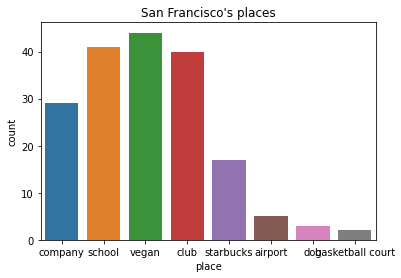

In [20]:
places = geo.creatingPlaces(sf_coordinates, distance, sf_venues, city)

places.place.value_counts()
sns.countplot(x='place', data=places).set_title("San Francisco's places")

Text(0.5, 1.0, "Los Angeles' places")

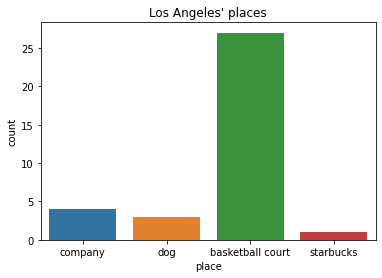

In [21]:
la_venues = db.get_collection("la_venues")
la_coordinates = [-118.243425, 34.052187]
distance = 10000
city = "la"
places = geo.creatingPlaces(la_coordinates, distance, la_venues, city)
places.place.value_counts()
sns.countplot(x='place', data=places).set_title("Los Angeles' places")

Text(0.5, 1.0, "New York's places")

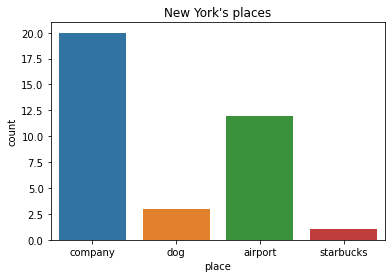

In [22]:
ny_venues = db.get_collection("ny_venues")
ny_coordinates = [-73.984268, 40.743662] 
distance = 2000
city = "ny"
places = geo.creatingPlaces(ny_coordinates, distance, ny_venues, city)
places.place.value_counts()
sns.countplot(x='place', data=places).set_title("New York's places")

Finally we have to take in count that the given ratio to Los Angeles was 10km. and the given ratio to New York was 2km, compared to just a 1km-ratio of San Francisco's offices. If you can see each map in a Jupyter Notebook, you will see that San Francisco has two near zones which works with this amount of places. So, at the end, we can choose every offices from this two limited zones. 